# **Dataset** - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/Research

# Importing Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import tensorflow as tf
from keras.callbacks import CSVLogger

# Directory & data setup

In [4]:
main_dirction_path = '/content/drive/MyDrive/Research/chest_xray/'
print(os.listdir(main_dirction_path))

['test', 'train', 'val', 'chest_xray', '__MACOSX']


In [5]:
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

In [6]:
train_n_path = train_folder_path+'/NORMAL/'
train_p_path = train_folder_path+'/PNEUMONIA/'

test_n_path = test_folder_path+'/NORMAL/'
test_p_path = test_folder_path+'/PNEUMONIA/'

val_n_path = val_folder_path+'/NORMAL/'
val_p_path = val_folder_path+'/PNEUMONIA/'

In [7]:
print(len(os.listdir(train_n_path))) #length of normal training images
print(len(os.listdir(train_p_path))) #length of pneumonia training images 

print('TOTAL TRAIN IMAGES:', len(os.listdir(train_n_path)) + len(os.listdir(train_p_path)))

1341
3875
TOTAL TRAIN IMAGES: 5216


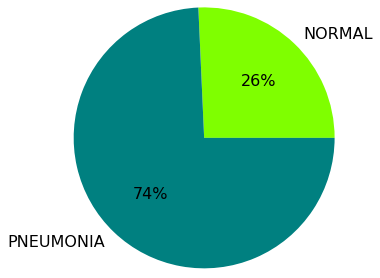

In [8]:
x = np.array([len(os.listdir(train_n_path)),len(os.listdir(train_p_path))])
labels = ['NORMAL', 'PNEUMONIA']
colors = {'NORMAL': 'chartreuse','PNEUMONIA': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

# Visulaization 

(-0.5, 879.5, 743.5, -0.5)

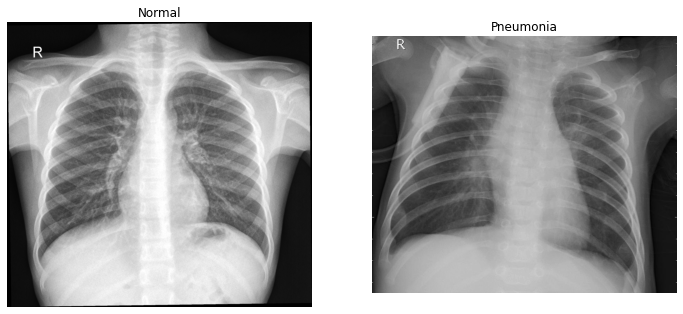

In [9]:
# Choose random image from normal folder
random_normal= np.random.randint(0,len(os.listdir(train_n_path))) 
normal_img = os.listdir(train_n_path)[random_normal]
normal_img_address = train_n_path+normal_img

# Choose random image from pneumonia folder
random_pneumonia = np.random.randint(0,len(os.listdir(train_p_path)))
pneumonia_img =  os.listdir(train_p_path)[random_pneumonia]
pneumonia_img_address = train_p_path+pneumonia_img

#Load 2 images
normal_load = Image.open(normal_img_address)
pneumonia_load = Image.open(pneumonia_img_address)

#Visulaizaion  --  Matplotlib
figure = plt.figure(figsize= (12,12))
img1 = figure.add_subplot(1,2,1)
img_plot = plt.imshow(normal_load, cmap = 'gray')
img1.set_title('Normal')
plt.axis("off")

img2 = figure.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneumonia_load, cmap = 'gray')
img2.set_title('Pneumonia')
plt.axis("off")

In [10]:
def show_normal_images (number):
    plt.figure(figsize=(16,16))
    for n in range(number):
        normal_img = os.listdir(train_n_path)[n]
        normal_img_address = train_n_path+normal_img
        normal_load = Image.open(normal_img_address)
        ax = plt.subplot(5,5,n+1)
        plt.imshow(normal_load, cmap ='gray')
        plt.title("NORMAL")
        plt.axis("off")
        
def show_pneumonia_images (number):
    plt.figure(figsize=(16,16))
    for n in range(number):
        pneumonia_img =  os.listdir(train_p_path)[n]
        pneumonia_img_address = train_p_path+pneumonia_img
        pneumonia_load = Image.open(pneumonia_img_address)
        ax = plt.subplot(5,5,n+1)
        plt.imshow(pneumonia_load, cmap ='gray')
        plt.title("PNEUMONIA")
        plt.axis("off")

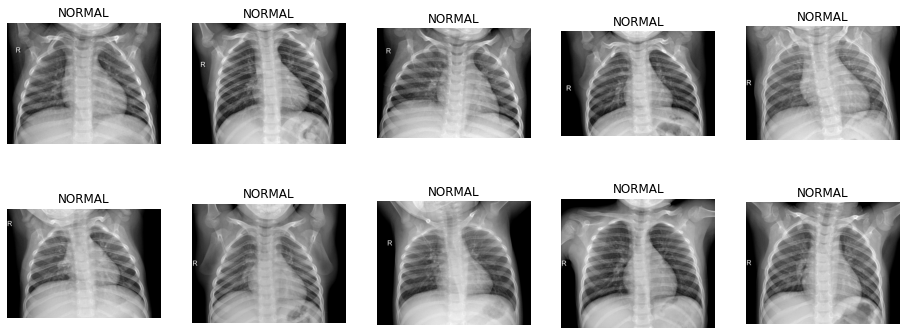

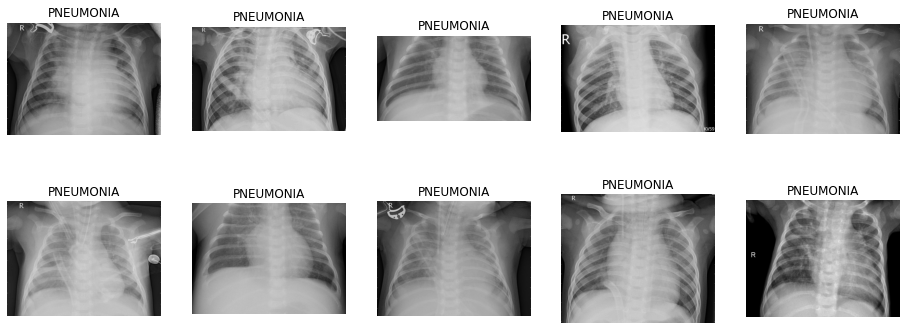

In [11]:
show_normal_images(10)
show_pneumonia_images(10)

# Pre-processing

In [12]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder_path,
    validation_split=0.2,
    image_size=(64,64),
    batch_size=64,
    subset='training',
    seed=1000)

validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder_path,
    validation_split=0.2,
    image_size=(64,64),
    batch_size=64,
    subset='validation',
    seed=1000
    )

test_set = tf.keras.preprocessing.image_dataset_from_directory(test_folder_path,
                                                              image_size = (64, 64),
                                                              batch_size = 64,
                                                              shuffle=False)

training_set = training_set.map(lambda x, y: (tf.divide(x, 255), y))
validation_set = validation_set.map(lambda x, y: (tf.divide(x, 255), y))
test_set = test_set.map(lambda x, y: (tf.divide(x, 255), y))

class_name=["Normal", "Pneumonia"]

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 5216 files belonging to 2 classes.
Using 1043 files for validation.
Found 624 files belonging to 2 classes.


# CNN Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import plot_model

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size= (3, 3), activation='relu', input_shape=(64, 64, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

## Optimizer = **Adam**

Learning rate - 0.01 

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

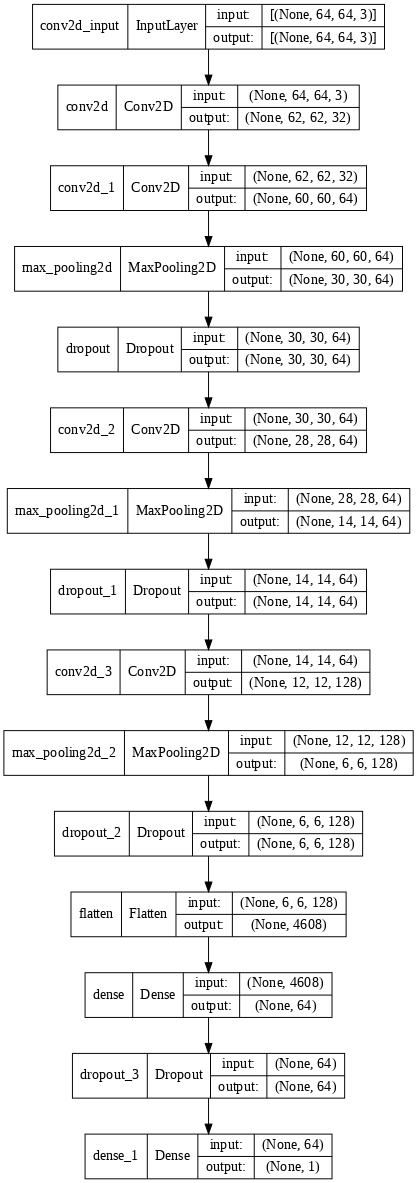

In [16]:
plot_model(model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

## Training

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

cnn_model = model.fit(training_set,
                      epochs = 60,
                      validation_data = validation_set,
                      callbacks= [callbacks]
                      )

Epoch 1/60
66/66 [==============================] - 608s 8s/step - loss: 0.5190 - accuracy: 0.7644 - val_loss: 0.2824 - val_accuracy: 0.8859
Epoch 2/60
66/66 [==============================] - 27s 364ms/step - loss: 0.2642 - accuracy: 0.8879 - val_loss: 0.1958 - val_accuracy: 0.9319
Epoch 3/60
66/66 [==============================] - 32s 440ms/step - loss: 0.1958 - accuracy: 0.9226 - val_loss: 0.3063 - val_accuracy: 0.8792
Epoch 4/60
66/66 [==============================] - 27s 367ms/step - loss: 0.1930 - accuracy: 0.9250 - val_loss: 0.1840 - val_accuracy: 0.9329
Epoch 5/60
66/66 [==============================] - 27s 365ms/step - loss: 0.1660 - accuracy: 0.9348 - val_loss: 0.1347 - val_accuracy: 0.9521
Epoch 6/60
66/66 [==============================] - 27s 367ms/step - loss: 0.1349 - accuracy: 0.9470 - val_loss: 0.1058 - val_accuracy: 0.9626
Epoch 7/60
66/66 [==============================] - 27s 368ms/step - loss: 0.1350 - accuracy: 0.9490 - val_loss: 0.1457 - val_accuracy: 0.9453
E

**97.17%** accuracy on Training set<br>
**96.93%** accuracy on Validation set<br>



In [18]:
model.save('/content/drive/MyDrive/Research/CNN_adam.h5')

# Loss Graph : Adam

<Figure size 2880x576 with 0 Axes>

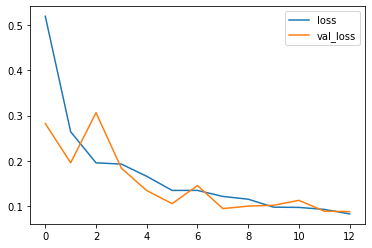

In [19]:
plt.figure(figsize=(40,8))
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.savefig('/content/drive/MyDrive/Research/Adam_Loss.png',dpi=720)

# Accuracy Graph : Adam


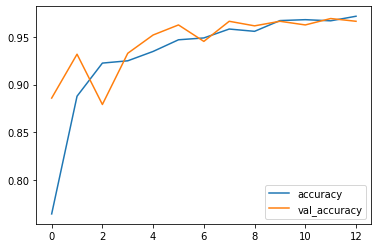

In [20]:
losses[['accuracy','val_accuracy']].plot()
plt.savefig('/content/drive/MyDrive/Research/Adam_Accuracy.png',dpi=720)


# Evaluation on Test set

In [21]:
from tensorflow.keras.models import load_model

adam_model=load_model('/content/drive/MyDrive/Research/CNN_adam.h5')

In [ ]:
loss, acc = adam_model.evaluate(test_set)

10/10 [==============================] - 3s 287ms/step - loss: 1.0615 - accuracy: 0.7628


76.28% acuracy on Test Set

# Confusion Matrix

In [22]:
label_true=[]
label_estimated=[]

for images, labels in test_set:
    predicted_val = adam_model.predict(images)[:,0]
    for i in range(len(labels)):
        label_true.append(labels[i].numpy())
        label_estimated.append(predicted_val[i])

label_true = np.asarray(label_true)
label_estimated = np.asarray(label_estimated)
label_estimated[label_estimated <= 0.5] = int(0)
label_estimated[label_estimated > 0.5] = int(1)

Text(0.5, 15.0, 'True value')

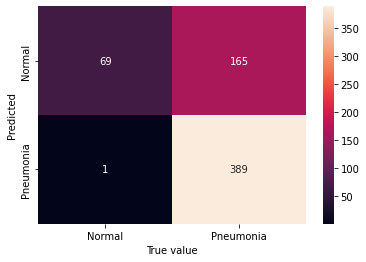

In [23]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(label_true,label_estimated)
ax = sns.heatmap(matrix,xticklabels = class_name, yticklabels = class_name,annot=True,fmt="d")
ax.set_ylabel('Predicted')
ax.set_xlabel('True value')

# Testing 

This x-ray is Normal 


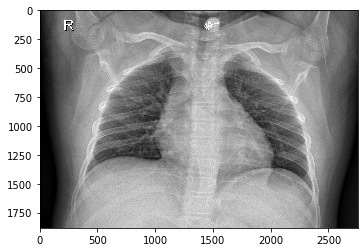

In [24]:
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
   plt.imshow(Image.open(filename), cmap="gray", interpolation='none')
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('/content/drive/MyDrive/Research/chest_xray/test/NORMAL/IM-0050-0001.jpeg')   # <- Enter the image file path to the image you want to test.
prediction= adam_model.predict(image)[0][0]                                          # <- change the model 
if prediction>0.7:
  print("This x-ray is Pneumonia ")
else:
  print("This x-ray is Normal ")


0.999603
This x-ray is Pneumonia 


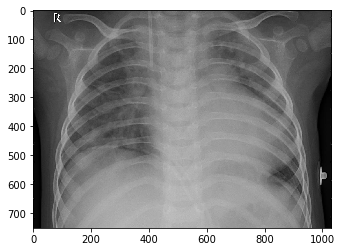

In [25]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   plt.imshow(Image.open(filename), cmap="gray", interpolation='none')
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('/content/drive/MyDrive/Research/chest_xray/test/PNEUMONIA/person101_bacteria_485.jpeg')   # <- Enter the image file path to the image you want to test.
prediction=adam_model.predict(image)[0][0]                                       # <- change the model 
print(prediction)
if prediction>0.7:
  print("This x-ray is Pneumonia ")
else:
  print("This x-ray is Normal ")

# Optimizer = **rmsprop**

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

cnn_rms_model = model.fit(training_set,
                      epochs = 60,
                      validation_data = validation_set,
                      callbacks= [callbacks]
                      )

Epoch 1/60
66/66 [==============================] - 28s 374ms/step - loss: 0.6384 - accuracy: 0.7266 - val_loss: 0.6171 - val_accuracy: 0.7411
Epoch 2/60
66/66 [==============================] - 27s 374ms/step - loss: 0.4599 - accuracy: 0.7951 - val_loss: 0.3165 - val_accuracy: 0.9118
Epoch 3/60
66/66 [==============================] - 27s 371ms/step - loss: 0.2519 - accuracy: 0.8958 - val_loss: 0.1951 - val_accuracy: 0.9329
Epoch 4/60
66/66 [==============================] - 27s 368ms/step - loss: 0.2050 - accuracy: 0.9135 - val_loss: 0.1420 - val_accuracy: 0.9501
Epoch 5/60
66/66 [==============================] - 27s 366ms/step - loss: 0.2168 - accuracy: 0.9248 - val_loss: 0.1338 - val_accuracy: 0.9463
Epoch 6/60
66/66 [==============================] - 27s 365ms/step - loss: 0.1639 - accuracy: 0.9399 - val_loss: 0.2403 - val_accuracy: 0.8965
Epoch 7/60
66/66 [==============================] - 27s 367ms/step - loss: 0.1382 - accuracy: 0.9530 - val_loss: 0.1023 - val_accuracy: 0.9521

**97.03%** accuray on Training set <br>
**96.93%** accuray on validation  set

In [ ]:
model.save('/content/drive/MyDrive/Research/CNN_rmsprop.h5')

## Loss 

<Figure size 2880x576 with 0 Axes>

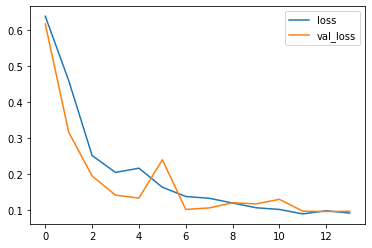

In [28]:
plt.figure(figsize=(40,8))
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.savefig('/content/drive/MyDrive/Research/rmsprop_Loss.png',dpi=720)

## Accuracy

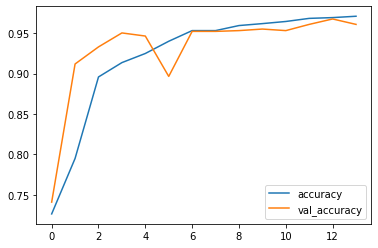

In [29]:
losses[['accuracy','val_accuracy']].plot()
plt.savefig('/content/drive/MyDrive/Research/rmsprop_Accuracy.png',dpi=720)

In [32]:
rmsprop_model=load_model('/content/drive/MyDrive/Research/CNN_rmsprop.h5')

## Testing 

In [33]:
loss, acc = rmsprop_model.evaluate(test_set)

10/10 [==============================] - 3s 257ms/step - loss: 0.7788 - accuracy: 0.7965


79.65% accuracy on test set

Text(0.5, 15.0, 'True value')

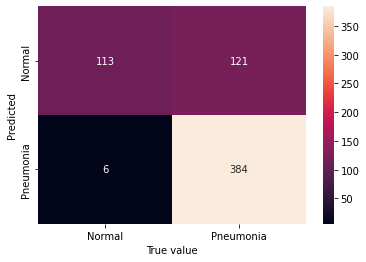

In [34]:
label_true=[]
label_estimated=[]
for images, labels in test_set:
    predicted_val = rmsprop_model.predict(images)[:,0]
    for i in range(len(labels)):
        label_true.append(labels[i].numpy())
        label_estimated.append(predicted_val[i])

label_true = np.asarray(label_true)
label_estimated = np.asarray(label_estimated)
label_estimated[label_estimated <= 0.5] = int(0)
label_estimated[label_estimated > 0.5] = int(1)

matrix = confusion_matrix(label_true,label_estimated)
ax = sns.heatmap(matrix,xticklabels = class_name, yticklabels = class_name,annot=True,fmt="d")
ax.set_ylabel('Predicted')
ax.set_xlabel('True value')

# Optimizer = **SGD**

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


cnn_sgd_model = model.fit(training_set,
                      epochs = 60,
                      validation_data = validation_set,
                      callbacks= [callbacks]
                      )


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

60 epochs 

*   94.66% accuray on Training set
*   92.91% accuracy on Validaton set




In [ ]:
model.save('/content/drive/MyDrive/Research/CNN_sgd.h5')

## Loss

<Figure size 2880x576 with 0 Axes>

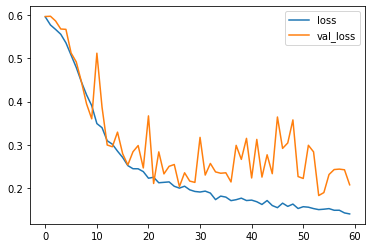

In [ ]:
plt.figure(figsize=(40,8))
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.savefig('/content/drive/MyDrive/Research/sgd_Loss.png',dpi=720)

### Accuracy

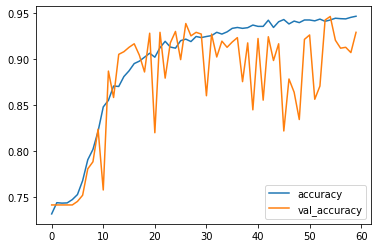

In [ ]:
losses[['accuracy','val_accuracy']].plot()
plt.savefig('/content/drive/MyDrive/Research/sgd_Accuracy.png',dpi=720)

In [ ]:
sgd_model=load_model('/content/drive/MyDrive/Research/CNN_sgd.h5')
loss, acc = sgd_model.evaluate(test_set)


10/10 [==============================] - 3s 286ms/step - loss: 0.4346 - accuracy: 0.8157


Text(0.5, 15.0, 'True value')

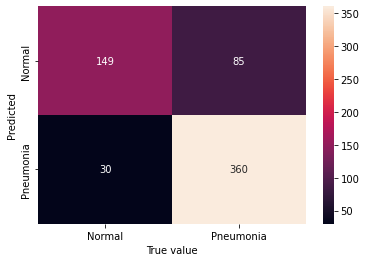

In [ ]:
label_true=[]
label_estimated=[]
for images, labels in test_set:
    predicted_val = sgd_model.predict(images)[:,0]
    for i in range(len(labels)):
        label_true.append(labels[i].numpy())
        label_estimated.append(predicted_val[i])

label_true = np.asarray(label_true)
label_estimated = np.asarray(label_estimated)
label_estimated[label_estimated <= 0.5] = int(0)
label_estimated[label_estimated > 0.5] = int(1)

matrix = confusion_matrix(label_true,label_estimated)
ax = sns.heatmap(matrix,xticklabels = class_name, yticklabels = class_name,annot=True,fmt="d")
ax.set_ylabel('Predicted')
ax.set_xlabel('True value')

# Optimizer = **Adadelta**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'Adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


cnn_sgd_model = model.fit(training_set,
                      epochs = 60,
                      validation_data = validation_set,
                      callbacks= [callbacks]
                      )


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

74.31% accuracy on Training set <br>
74.11% accuracy on Validation set

In [ ]:
model.save('/content/drive/MyDrive/Research/CNN_Adadelta.h5')

<Figure size 2880x576 with 0 Axes>

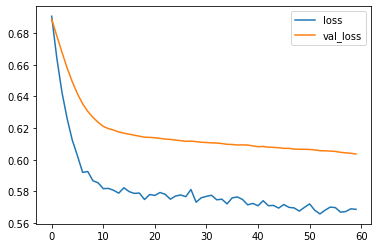

In [ ]:
plt.figure(figsize=(40,8))
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.savefig('/content/drive/MyDrive/Research/adadelta_Loss.png',dpi=720)

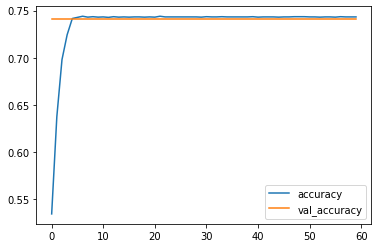

In [ ]:
losses[['accuracy','val_accuracy']].plot()
plt.savefig('/content/drive/MyDrive/Research/adadelta_Accuracy.png',dpi=720)

In [ ]:
adadelta_model=load_model('/content/drive/MyDrive/Research/CNN_Adadelta.h5')
loss, acc = adadelta_model.evaluate(test_set)


10/10 [==============================] - 3s 292ms/step - loss: 0.6610 - accuracy: 0.6250


Text(0.5, 15.0, 'True value')

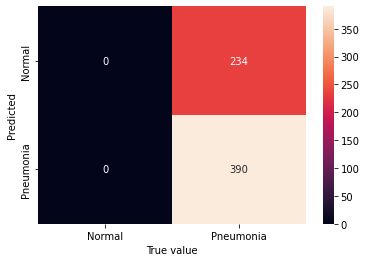

In [ ]:
label_true=[]
label_estimated=[]
for images, labels in test_set:
    predicted_val = adadelta_model.predict(images)[:,0]
    for i in range(len(labels)):
        label_true.append(labels[i].numpy())
        label_estimated.append(predicted_val[i])

label_true = np.asarray(label_true)
label_estimated = np.asarray(label_estimated)
label_estimated[label_estimated <= 0.5] = int(0)
label_estimated[label_estimated > 0.5] = int(1)

matrix = confusion_matrix(label_true,label_estimated)
ax = sns.heatmap(matrix,xticklabels = class_name, yticklabels = class_name,annot=True,fmt="d")
ax.set_ylabel('Predicted')
ax.set_xlabel('True value')

# Optimizer = **Adagrad**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adagrad' , loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


cnn_sgd_model = model.fit(training_set,
                      epochs = 60,
                      validation_data = validation_set,
                      callbacks= [callbacks]
                      )

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

88.52% accuracy on training set <br>
91.28% accuracy on test set

In [ ]:
model.save('/content/drive/MyDrive/Research/CNN_Adagrade.h5')

<Figure size 2880x576 with 0 Axes>

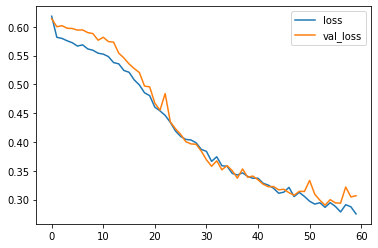

In [ ]:
plt.figure(figsize=(40,8))
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.savefig('/content/drive/MyDrive/Research/adagrade_Loss.png',dpi=720)

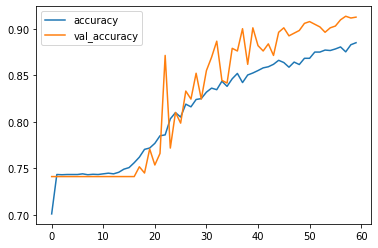

In [ ]:
losses[['accuracy','val_accuracy']].plot()
plt.savefig('/content/drive/MyDrive/Research/adagrade_Accuracy.png',dpi=720)

In [ ]:
adagrade_model=load_model('/content/drive/MyDrive/Research/CNN_Adagrade.h5')
loss, acc = adagrade_model.evaluate(test_set)

10/10 [==============================] - 3s 290ms/step - loss: 0.6610 - accuracy: 0.6250


Text(0.5, 15.0, 'True value')

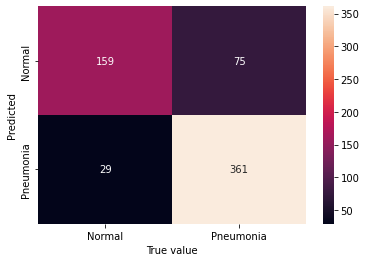

In [ ]:
label_true=[]
label_estimated=[]
for images, labels in test_set:
    predicted_val = adagrade_model.predict(images)[:,0]
    for i in range(len(labels)):
        label_true.append(labels[i].numpy())
        label_estimated.append(predicted_val[i])

label_true = np.asarray(label_true)
label_estimated = np.asarray(label_estimated)
label_estimated[label_estimated <= 0.5] = int(0)
label_estimated[label_estimated > 0.5] = int(1)

matrix = confusion_matrix(label_true,label_estimated)
ax = sns.heatmap(matrix,xticklabels = class_name, yticklabels = class_name,annot=True,fmt="d")
ax.set_ylabel('Predicted')
ax.set_xlabel('True value')